# Problemstatement
What are the characteristics of _digital capabilities_ in the current body of knowledge?

1. Getting the Data - Systemeic Literature review, conducted manually (122 Papers searched and selected on Ebsco)
2. Cleaning the Data
3. Organizing the Data

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re

In [3]:
!pip install PyPrind

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install lda

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install tmtoolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 3.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19546 sha256=68fe43d5afdfb2edbd8bf3513b1dc42fcbf90cd5e0730643f3cda81f058a5b8c
  Stored in directory: /home/escp/.cache/pip/wheels/e6/c5/26/0d27e07d567b3b4e63a618efff19a2cdbab636ac1295d20206
Successfully built globr

In [12]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 2.3 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 822.5/822.5 kB 5.9 MB/s eta 0:00:007.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.0/460.0 kB 5.5 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [13]:
!pip install -U "tmtoolkit[recommended,lda,sklearn,gensim]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 6.0 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00


In [1]:
!pip install setuptools

Defaulting to user installation because normal site-packages is not writeable


In [25]:
!pip install -U tmtoolkit[textproc_extra]

  Using cached PyICU-2.9.tar.gz (305 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      Package icu-i18n was not found in the pkg-config search path.
      Perhaps you should add the directory containing `icu-i18n.pc'
      to the PKG_CONFIG_PATH environment variable
      No package 'icu-i18n' found
      (running 'icu-config --version')
      (running 'pkg-config --modversion icu-i18n')
      Traceback (most recent call last):
        File "<string>", line 63, in <module>
        File "/usr/lib/python3.10/os.py", line 679, in __getitem__
          raise KeyError(key) from None
      KeyError: 'ICU_VERSION'
      
      During handling of the above exception, another exception occurred:
      
      Traceback (most recent call last):
        File "<string>", line 66, in <module>
        Fi

In [15]:
!pip install bidict

In [16]:
!pip install loky

In [17]:
from tmtoolkit.corpus import Corpus

In [18]:
from tmtoolkit.corpus import tokens_table

In [19]:
from tmtoolkit.corpus import print_summary

In [27]:
import os

In [43]:
path = "/home/escp/Downloads/corpus_text"
os.chdir(path)

In [44]:
cwd = os.getcwd()  # Get the current working directory (cwd)
cwd

'/home/escp/Downloads/corpus_text'

In [45]:
files = os.listdir('/home/escp/Downloads/corpus_text')  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/home/escp/Downloads/corpus_text': ['Emergent market innovation A longitudinal study of technology-driven.txt', 'What matters in implementing the.txt', 'Role of Digital Capabilities in Unleashing.txt', 'Four Trends Shaping the.txt', 'Internet marketing capabilities and international market growth.txt', 'Stepwise Evolution of Capabilities for.txt', 'Developing business analytic capabilities for combating e-commerce.txt', 'Digital transformation Five recommendations for the digitally conscious firm.txt', 'Pricing in the digital world.txt', 'How Much Do Your Co-Opetitors_ Capabilities Matter in the Face of Technological.txt', 'Dynamic capabilities for.txt', 'The digital marketing capabilities gap.txt', 'Circular economy and digital capabilities of SMEs for providing value to.txt', 'Antecedents and outcomes of collaborative innovation capabilities on the.txt', 'Digital platforms and SMEs’ business model innovation Exploring the.txt', 'Technological Frames, Organizational Capabili

In [26]:
from collections import defaultdict
from gensim import corpora

In [5]:
!python -m spacy download en_core_web_sm   

/bin/bash: line 1: python: command not found


In [33]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [34]:
!python -m spacy download en_core_web_lg 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [49]:
spacy.load('en_core_web_lg')

In [3]:
pip install -U tmtoolkit

Defaulting to user installation because normal site-packages is not writeable
  Using cached tmtoolkit-0.11.2-py3-none-any.whl (7.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 582.2 kB/s eta 0:00:00m eta 0:00:010:00:02
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 4.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached globre-0.1.5.tar.gz (20 kB)
  Preparing metadata (setup.py) ... done
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 6.5 MB/s eta 0:00:0031m11.8 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
 

In [42]:
!pip install -U "tmtoolkit[recommended,lda,sklearn,gensim]"

In [43]:
from tmtoolkit.corpus import tokens_table

In [44]:
from tmtoolkit.corpus import corpus_summary

In [45]:
from tmtoolkit.corpus import strip_tags

In [52]:
pip install -U pip setuptools wheel

  Using cached setuptools-65.3.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.1
    Uninstalling setuptools-63.4.1:
      Successfully uninstalled setuptools-63.4.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
from nltk import corpus

In [11]:
from tmtoolkit.corpus import Corpus

In [49]:
corp = Corpus.from_builtin_corpus('en-News100')
corp

<Corpus [100 documents  / language "en"]>

In [54]:
corp = Corpus.from_folder('/home/escp/Downloads/corpus_text', language='en', encoding='unicode_escape')
corp

<Corpus [122 documents  / language "en"]>

In [55]:
corp.doc_labels

['Emergent market innovation A longitudinal study of technology-driven',
 'What matters in implementing the',
 'Role of Digital Capabilities in Unleashing',
 'Four Trends Shaping the',
 'Internet marketing capabilities and international market growth',
 'Stepwise Evolution of Capabilities for',
 'Developing business analytic capabilities for combating e-commerce',
 'Digital transformation Five recommendations for the digitally conscious firm',
 'Pricing in the digital world',
 'How Much Do Your Co-Opetitors_ Capabilities Matter in the Face of Technological',
 'Dynamic capabilities for',
 'The digital marketing capabilities gap',
 'Circular economy and digital capabilities of SMEs for providing value to',
 'Antecedents and outcomes of collaborative innovation capabilities on the',
 'Digital platforms and SMEs’ business model innovation Exploring the',
 'Technological Frames, Organizational Capabilities',
 'Leadership, Capabilities, and Technological Change The Transformation of NCR in t

In [56]:
corp['A blueprint for succeeding despite']['token']

['A',
 'blueprint',
 'for',
 'succeeding',
 'despite',
 '\n',
 'uncertain',
 'global',
 'markets',
 '\n\n',
 'Peter',
 'Zámborský',
 '\n\n',
 'Peter',
 'Za',
 '´',
 'mborsky',
 '´',
 'is',
 'based',
 '\n',
 'at',
 'the',
 'Department',
 'of',
 '\n',
 'Management',
 'and',
 '\n',
 'International',
 'Business',
 ',',
 'The',
 '\n',
 'University',
 'of',
 'Auckland',
 '\n',
 'Business',
 'School',
 ',',
 '\n',
 'Auckland',
 ',',
 'New',
 'Zealand',
 '.',
 '\n\n',
 'The',
 'paper',
 'is',
 'building',
 'on',
 'my',
 '\n',
 'earlier',
 'book',
 'entitled',
 'Global',
 '\n',
 'Strategy',
 ':',
 'Thriving',
 'in',
 'a',
 'World',
 'of',
 '\n',
 'Uncertainty',
 '(',
 '2018',
 ')',
 ',',
 'published',
 '\n',
 'by',
 'Top',
 'Hat',
 ',',
 'Toronto',
 ',',
 'Canada',
 '.',
 '\n\n',
 'Introduction',
 '\n\n',
 'Uncertainty',
 'in',
 'the',
 'global',
 'business',
 'environment',
 'is',
 'increasing',
 ',',
 'with',
 'political',
 'upheavals',
 'such',
 '\n',
 'as',
 'Brexit',
 'and',
 'the',
 'US',

In [58]:
from tmtoolkit.corpus import print_summary

print_summary(corp)

Corpus with 122 documents in English
> A blueprint for succeeding despite (5532 tokens): A blueprint for succeeding despite   uncertain glo...
> An examination of associations (20326 tokens): BPMJ   27,1    124    Received 22 February 2020   ...
> A Hierarchical Approach to Technology (7978 tokens): Feature article    A Hierarchical Approach to Tech...
> A comparison of the capabilities of software tools designed to support the (11672 tokens): int . j. prod . res . , 1998 , vol . 36 , no . 2 ,...
> Aligning and Reconciling Building project capabilities for digital (32829 tokens): Research   Policy   46   ( 2017 )   93â107    Co...
> An Industry 4.0 maturity (12438 tokens): Industry 4.0   maturity model   proposal    Receiv...
> Antecedents and outcomes of collaborative innovation capabilities on the (14985 tokens): International Journal of Information Management 43...
> Adapting to Fast-Changing (12462 tokens): Adapting to Fast - Changing   Markets and Technolo...
> A dashboard for m

In [59]:
from tmtoolkit.corpus import doc_tokens, tokens_table

In [60]:
from tmtoolkit.corpus import vocabulary

vocabulary(corp,sort = False)

{'WPI',
 '479â\x80\x93496',
 '2.343',
 'combinatory',
 'flowers',
 'ored',
 'Yzerbyt',
 'algebra.15',
 'voll',
 '157â\x80\x93186',
 'lized',
 'Resultsâ\x80\x9d',
 'cyberattack',
 'fund-',
 'entrantsâ\x80\x9d',
 'preferring',
 'Pluralism',
 'https://doi.org/10.1016/j.ijpe.2020.107619',
 'Accessibility',
 'doi.org/10.1057/jibs.2012.8',
 'banking.â\x80\x9d',
 'Engine',
 'challengesâ\x80\x94poor',
 '0.0400',
 'decides',
 '0.093',
 '1093',
 'Idiosyncrasy',
 'interac-',
 'withâ\x80\x82theâ\x80\x82diminishingâ\x80\x82supplyâ\x80\x82andâ\x80\x82move-',
 'Durand',
 'thor-',
 'know^ledge',
 'Grifï¬\x81n',
 '349â\x80\x93363',
 'DL',
 'adoptability',
 'alarming',
 'lic',
 'ICT',
 'Mettler',
 'http://www.iberglobal.com/files/Roland_Berger_Industry.pdf',
 'â\x88\x92.26',
 'success',
 'Shehata',
 'â\x80\x9cknowledge',
 'InternationalReviewofEconomicsandFinance76(2021)55â\x80\x937468',
 '0.0158',
 'CIOâ\x80\x99s',
 '316â\x80\x93327',
 'Dhanaraj',
 'needâ\x80\x82toâ\x80\x82beâ\x80\x82managed.â\x80\x82T

In [61]:
from tmtoolkit.corpus import vocabulary_size

vocabulary_size(corp)

68099

In [62]:
from tmtoolkit.corpus import vocabulary_counts

vocabulary_counts(corp)

{'ID': 8,
 'POS': 7,
 'TAG': 1,
 'SYM': 2,
 'X': 55,
 'ORG': 2,
 'PRODUCT': 11,
 'TIME': 10,
 'agent': 21,
 'mark': 7,
 'meta': 50,
 'number': 580,
 'possessive': 2,
 'root': 50,
 '_': 165,
 '97â\x80\x93103': 1,
 'FUTURE': 1,
 'Stepwise': 23,
 '1170â\x80\x931181': 1,
 'supplier-': 6,
 'passion': 9,
 'FGV': 1,
 'parsimonious': 32,
 'nerships': 7,
 'Allrad': 2,
 'overâ\x80\x82again.â\x80\x82Forâ\x80\x82example': 1,
 'Evolutionary': 21,
 'Hayesâ\x80\x99s': 1,
 'â\x80\x83Forrester': 1,
 'ISO4â\x80\x94Problem': 1,
 'CIC5': 1,
 'Hyll': 2,
 'unable': 24,
 'predefined': 9,
 'EDHEC': 2,
 'Validating': 2,
 '220â\x80\x93231': 1,
 'Where': 29,
 '1241': 2,
 'OASIS': 3,
 'z': 123,
 'SSADM': 2,
 'thinkingâ\x80\x9d': 2,
 'pharmaceuâ\x80\x90': 1,
 'diversifying': 8,
 '83â\x80\x9396': 1,
 'Niesten': 7,
 'R2(OM': 1,
 'WÂ¨agerâ\x80\x99s': 1,
 'Externalities': 1,
 'Oke': 9,
 '1.79': 5,
 'bets\x94': 1,
 '86(1': 2,
 'Coimbatore': 1,
 '1395â\x80\x931427': 1,
 'Closer': 2,
 'â\x80\x9ccornerstoneâ\x80\x9d': 1,


In [63]:
import matplotlib.pyplot as plt
from tmtoolkit.corpus.visualize import (plot_doc_lengths_hist,
    plot_doc_frequencies_hist, plot_ranked_vocab_counts)

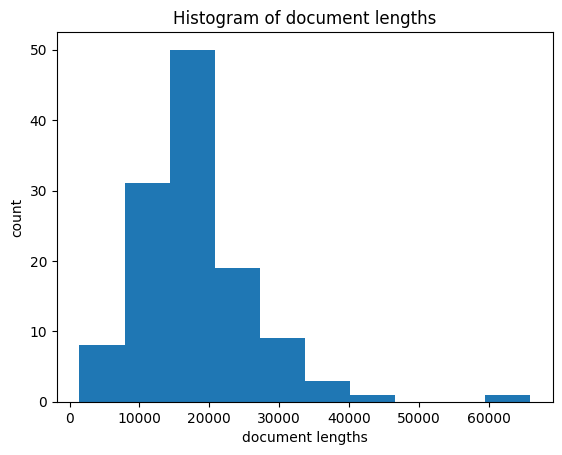

In [64]:
fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, corp, y_log=False)  # use linear scale
plt.show();

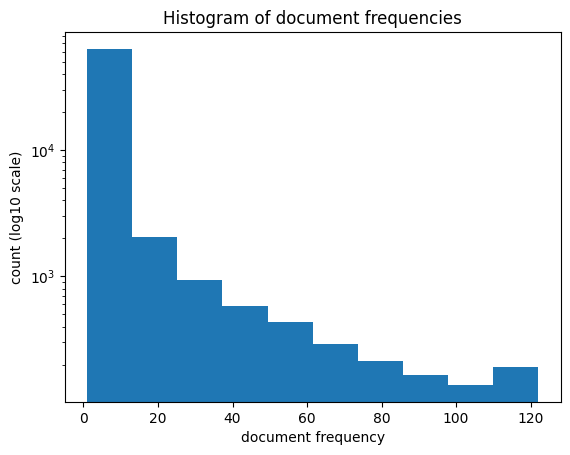

In [65]:
fig, ax = plt.subplots()
plot_doc_frequencies_hist(fig, ax, corp)
plt.show();

This shows us that the large majority of token types has a low document frequency, i.e. they occur only in a few documents. There are only very few token types that occur in almost every document. Words like “the” or “a” are usually among these.

In [6]:
from tmtoolkit.corpus import to_lowercase

In [68]:
from copy import copy

corpus_orig = copy(corp)
print_summary(corpus_orig)   # same content

Corpus with 122 documents in English
> A blueprint for succeeding despite (5532 tokens): A blueprint for succeeding despite   uncertain glo...
> An examination of associations (20326 tokens): BPMJ   27,1    124    Received 22 February 2020   ...
> A Hierarchical Approach to Technology (7978 tokens): Feature article    A Hierarchical Approach to Tech...
> A comparison of the capabilities of software tools designed to support the (11672 tokens): int . j. prod . res . , 1998 , vol . 36 , no . 2 ,...
> Aligning and Reconciling Building project capabilities for digital (32829 tokens): Research   Policy   46   ( 2017 )   93â107    Co...
> An Industry 4.0 maturity (12438 tokens): Industry 4.0   maturity model   proposal    Receiv...
> Antecedents and outcomes of collaborative innovation capabilities on the (14985 tokens): International Journal of Information Management 43...
> Adapting to Fast-Changing (12462 tokens): Adapting to Fast - Changing   Markets and Technolo...
> A dashboard for m

In [69]:
id(corp), id(corpus_orig)

(140678165074400, 140678718476864)

In [5]:
from tmtoolkit.corpus import lemmatize

In [18]:
from tmtoolkit.corpus import Corpus

In [19]:
corp = Corpus.from_folder('/home/escp/Downloads/corpus_text', language='en', encoding='unicode_escape')
corp

<Corpus [122 documents  / language "en"]>

In [20]:
# we use `inplace=False` to generate a lemmatized copy `corpus_norm`
# of the original data; all further steps will be applied to `corpus_norm`
# We employ a preprocessing pipeline that removes a lot of information from our original data in order to obtain a very condensed DTM.


from tmtoolkit.corpus import (lemmatize, filter_for_pos, to_lowercase,
    remove_punctuation, filter_clean_tokens, remove_common_tokens,
    tokens_table)


corpus_norm = lemmatize(corp, inplace=False)
filter_for_pos(corp, 'N')
to_lowercase(corpus_norm)
remove_punctuation(corpus_norm)
filter_clean_tokens(corpus_norm, remove_shorter_than=2)
# remove tokens that occur in all documents
remove_common_tokens(corpus_norm, df_threshold=5, proportions=0)

tokens_table(corpus_norm)

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
0,A Hierarchical Approach to Technology,0,roadmappe,False,False,roadmappe,False,VERB,VBG
1,A Hierarchical Approach to Technology,1,rto,False,False,RTO,False,PROPN,NNP
2,A Hierarchical Approach to Technology,2,roadmappe,False,False,roadmappe,False,VERB,VBG
3,A Hierarchical Approach to Technology,3,ufacture,False,False,ufacture,False,VERB,VBG
4,A Hierarchical Approach to Technology,4,osborne,False,False,Osborne,False,PROPN,NNP
...,...,...,...,...,...,...,...,...,...
100734,What matters in implementing the,836,gs1,False,False,GS1,False,PROPN,NNP
100735,What matters in implementing the,837,fof,False,False,fof,False,NOUN,NN
100736,What matters in implementing the,838,andrea,False,False,Andrea,False,PROPN,NNP
100737,What matters in implementing the,839,zangiacomi,False,False,Zangiacomi,False,PROPN,NNP


In [21]:
from tmtoolkit.corpus import print_summary
from tmtoolkit.corpus import remove_chars

# remove only full stops "."
remove_chars(corpus_norm, ['.',',',';',':'])
print_summary(corpus_norm)

Corpus with 122 documents in English
> A dashboard for measuring capability (560 tokens): sandesh mchugh freyae 31st satyam gatehall parsipp...
> An Industry 4.0 maturity (392 tokens): wwwemeraldinsightcom1741038xhtm reginaldo carreiro...
> A comparison of the capabilities of software tools designed to support the (1018 tokens): 291± ¯ exible extendible weston² e ective concept...
> Adapting to Fast-Changing (834 tokens): biofuel dupont novartisâs embryonic defense weâ...
> Aligning and Reconciling Building project capabilities for digital (933 tokens): 93â107 reconciling sunila lobo jennifer whyte wh...
> A contingency model of (631 tokens): wwwemeraldinsightcom03090566htm 2077 dakota fargo ...
> An examination of associations (694 tokens): bpmj revised httpswwwemeraldcominsight14637154htm ...
> Antecedents and outcomes of collaborative innovation capabilities on the (568 tokens): 273â283 wwwelseviercomlocateijinfomgt antecedent...
> A Hierarchical Approach to Technology (396 

In [22]:
?remove_chars

In [23]:
from tmtoolkit.corpus import remove_punctuation

# remove all punctuation
remove_punctuation(corpus_norm)
print_summary(corpus_norm)

Corpus with 122 documents in English
> A dashboard for measuring capability (560 tokens): sandesh mchugh freyae 31st satyam gatehall parsipp...
> An Industry 4.0 maturity (392 tokens): wwwemeraldinsightcom1741038xhtm reginaldo carreiro...
> A comparison of the capabilities of software tools designed to support the (1018 tokens): 291± ¯ exible extendible weston² e ective concept...
> Adapting to Fast-Changing (834 tokens): biofuel dupont novartisâs embryonic defense weâ...
> Aligning and Reconciling Building project capabilities for digital (933 tokens): 93â107 reconciling sunila lobo jennifer whyte wh...
> A contingency model of (631 tokens): wwwemeraldinsightcom03090566htm 2077 dakota fargo ...
> An examination of associations (694 tokens): bpmj revised httpswwwemeraldcominsight14637154htm ...
> Antecedents and outcomes of collaborative innovation capabilities on the (568 tokens): 273â283 wwwelseviercomlocateijinfomgt antecedent...
> A Hierarchical Approach to Technology (396 

In [24]:
from tmtoolkit.corpus import corpus_unique_chars

# original corpus
sorted(corpus_unique_chars(corp))

['\x00',
 '\x01',
 '\x02',
 '\x03',
 '\x08',
 '\x0f',
 '\x12',
 '\x13',
 '\x14',
 '\x15',
 '\x16',
 '\x17',
 '!',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '~',
 '\x80',
 '\x81',
 '\x82',
 '\x83',
 '\x84',
 '\x86',
 '\x87',
 '\x88',
 '\x89',
 '\x8a',
 '\x8b',
 '\x8d',
 '\x8e',
 '\x8f',
 '\x90',
 '\x91',
 '\x92',
 '\x93',
 '\x94',
 '\x96',
 '\x97',
 '\x98',
 '\x99',
 '\x9a',
 '\x9c',
 '\x9d',
 '\x9e',
 '\x9f',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '¦',
 '§',
 '¨',
 '©',
 'ª',
 '«',
 '¬',
 '\xad',
 '®',


In [25]:
from copy import copy
corpus_norm_copy = copy(corpus_norm)

In [26]:
print_summary(corpus_norm)

Corpus with 122 documents in English
> A dashboard for measuring capability (560 tokens): sandesh mchugh freyae 31st satyam gatehall parsipp...
> An Industry 4.0 maturity (392 tokens): wwwemeraldinsightcom1741038xhtm reginaldo carreiro...
> A comparison of the capabilities of software tools designed to support the (1018 tokens): 291± ¯ exible extendible weston² e ective concept...
> Adapting to Fast-Changing (834 tokens): biofuel dupont novartisâs embryonic defense weâ...
> Aligning and Reconciling Building project capabilities for digital (933 tokens): 93â107 reconciling sunila lobo jennifer whyte wh...
> A contingency model of (631 tokens): wwwemeraldinsightcom03090566htm 2077 dakota fargo ...
> An examination of associations (694 tokens): bpmj revised httpswwwemeraldcominsight14637154htm ...
> Antecedents and outcomes of collaborative innovation capabilities on the (568 tokens): 273â283 wwwelseviercomlocateijinfomgt antecedent...
> A Hierarchical Approach to Technology (396 

In [46]:
sorted(corpus_unique_chars(corpus_norm))

['\x00',
 '\x01',
 '\x02',
 '\x03',
 '\x08',
 '\x12',
 '\x13',
 '\x14',
 '\x15',
 '\x16',
 '\x17',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\x80',
 '\x81',
 '\x82',
 '\x83',
 '\x84',
 '\x86',
 '\x87',
 '\x88',
 '\x89',
 '\x8a',
 '\x8b',
 '\x8c',
 '\x8d',
 '\x8e',
 '\x8f',
 '\x90',
 '\x91',
 '\x92',
 '\x93',
 '\x94',
 '\x96',
 '\x97',
 '\x98',
 '\x99',
 '\x9a',
 '\x9b',
 '\x9c',
 '\x9d',
 '\x9e',
 '\x9f',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '§',
 '¨',
 'ª',
 '«',
 '¬',
 '\xad',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¸',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 '¿',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ë',
 'ì',
 'î',
 'ï',
 'ð',
 'ý']

In [27]:
from tmtoolkit.corpus import to_lowercase

In [30]:
from tmtoolkit.corpus import to_lowercase

to_lowercase(corpus_norm_copy)
print_summary(corpus_norm_copy)  # all tokens are lowercase


Corpus with 122 documents in English
> A dashboard for measuring capability (560 tokens): sandesh mchugh freyae 31st satyam gatehall parsipp...
> An Industry 4.0 maturity (392 tokens): wwwemeraldinsightcom1741038xhtm reginaldo carreiro...
> A comparison of the capabilities of software tools designed to support the (1018 tokens): 291± ¯ exible extendible weston² e ective concept...
> Adapting to Fast-Changing (834 tokens): biofuel dupont novartisâs embryonic defense weâ...
> Aligning and Reconciling Building project capabilities for digital (933 tokens): 93â107 reconciling sunila lobo jennifer whyte wh...
> A contingency model of (631 tokens): wwwemeraldinsightcom03090566htm 2077 dakota fargo ...
> An examination of associations (694 tokens): bpmj revised httpswwwemeraldcominsight14637154htm ...
> Antecedents and outcomes of collaborative innovation capabilities on the (568 tokens): 273â283 wwwelseviercomlocateijinfomgt antecedent...
> A Hierarchical Approach to Technology (396 

In [31]:
from tmtoolkit.corpus import filter_clean_tokens

# remove punct., stopwords, empty tokens (this is the default)
# plus tokens shorter than 2 characters

filter_clean_tokens(corpus_norm_copy, remove_shorter_than=2,remove_numbers = True,remove_punct = True,remove_stopwords = True
                   ,remove_empty = True,inplace = True)
print_summary(corpus_norm_copy)

Corpus with 122 documents in English
> A dashboard for measuring capability (553 tokens): sandesh mchugh freyae satyam gatehall parsippany s...
> An Industry 4.0 maturity (359 tokens): wwwemeraldinsightcom1741038xhtm reginaldo carreiro...
> A comparison of the capabilities of software tools designed to support the (984 tokens): 291± exible extendible weston² e ective concept ...
> Adapting to Fast-Changing (816 tokens): biofuel dupont novartisâs embryonic defense weâ...
> Aligning and Reconciling Building project capabilities for digital (927 tokens): 93â107 reconciling sunila lobo jennifer whyte wh...
> A contingency model of (557 tokens): wwwemeraldinsightcom03090566htm dakota fargo krush...
> An examination of associations (641 tokens): bpmj revised httpswwwemeraldcominsight14637154htm ...
> Antecedents and outcomes of collaborative innovation capabilities on the (548 tokens): 273â283 wwwelseviercomlocateijinfomgt antecedent...
> A Hierarchical Approach to Technology (390 t

In [32]:
from tmtoolkit.corpus import corpus_collocations

corpus_collocations(corpus_norm_copy).head(10) #Collocations are tokens that occur together in a series frequently (i.e. more than would be expected by chance). Examples could be the collocations “United”, “States” or “Bank”, “of”, “America”. The tmtoolkit package provides functions for identifying and joining such series of tokens.

,collocation,statistic
0,97â103 conceptualizing,1.0
1,nakhoda dlmmâ,1.0
2,cam220location room23event,1.0
3,orâfun damentallyârethinkâtheirâdesign...,1.0
4,itâan 119â135,1.0
5,agu iar,1.0
6,1395â1427 630â641,1.0
7,âdata drivenâidentificationâofâanalyti...,1.0
8,itci3 itci4,1.0
9,ratization remixe,1.0


In [34]:
from tmtoolkit.tokenseq import pmi3
corpus_collocations(corpus_norm_copy, statistic=pmi3).head(30)

,collocation,statistic
0,â â,-6.124895
1,âââ âââ,-6.736772
2,dpi dpi,-7.280196
3,basu muylle,-7.402441
4,muylle 437â499,-7.656563
5,utccid0 httpsaboutjstororgterm,-7.774540
6,bpm bpm,-7.792758
7,jafari sadeghi,-7.895705
8,sã£o paulo,-7.943111
9,lerch gotsch,-8.006497


In [36]:
corpus_collocations(corpus_norm, statistic=pmi3, threshold=-8.330693, as_table=False)

[('â\x97\x8b â\x97\x8b', -6.2046996113593105),
 ('\x00 \x00', -7.069040188990963),
 ('basu muylle', -7.482245238431575),
 ('muylle 437â\x80\x93499', -7.736367160216561),
 ('dpi dpi', -7.740255604006447),
 ('utccid0 httpsaboutjstororgterm', -7.8543442749917425),
 ('bpm bpm', -7.9201825018434775),
 ('jafari sadeghi', -7.975509182566615),
 ('sã£o paulo', -8.022915304963886),
 ('lerch gotsch', -8.08630108822165),
 ('rueden 103513', -8.16304254414676),
 ('camarinha matos', -8.178674408352663),
 ('nicoletti rueden', -8.178734087587086),
 ('v22 n2', -8.224451426702466),
 ('aug17 aug17', -8.326069525505496)]

In [40]:
from tmtoolkit.corpus import join_collocations_by_statistic

join_collocations_by_statistic(corpus_norm, statistic=pmi3, threshold=-8.330693,min_count = 5, return_joint_tokens=True,inplace= True)

{'\x00_\x00_\x00_\x00',
 'aug17_aug17',
 'basu_muylle_muylle_437â\x80\x93499',
 'bpm_bpm_bpm_bpm',
 'camarinha_matos',
 'dpi_dpi_dpi_dpi',
 'nicoletti_rueden',
 'rueden_103513',
 'v22_n2',
 'â\x97\x8b_â\x97\x8b_â\x97\x8b_â\x97\x8b'}

In [41]:
from tmtoolkit.corpus import join_collocations_by_statistic

join_collocations_by_statistic(corpus_norm_copy, statistic=pmi3, threshold=-8.330693,min_count = 5, return_joint_tokens=True,inplace= True)


{'aug17_aug17',
 'basu_muylle_muylle_437â\x80\x93499',
 'bpm_bpm_bpm_bpm',
 'dpi_dpi_dpi_dpi',
 'mgmt_cid019585247208',
 'muylle_437â\x80\x93499_basu_muylle',
 'n2_p380',
 'p380_apr',
 'v22_n2',
 'â\x88\x97â\x88\x97â\x88\x97_â\x88\x97â\x88\x97â\x88\x97_â\x88\x97â\x88\x97â\x88\x97_â\x88\x97â\x88\x97â\x88\x97',
 'â\x97\x8b_â\x97\x8b_â\x97\x8b_â\x97\x8b'}

In [45]:
from tmtoolkit.corpus import find_documents
find_documents(corpus_norm_copy, 'skill', as_table='-n_matches')

,doc,n_matches
